**Tarea 2: Redes Convolucionales y Recurrentes**

# Ejercicio 1: Operación de convolución

Se toma como base el código del [notebook referenciado en la tarea](https://github.com/gibranfp/CursoAprendizajeProfundo/blob/2026-1/notebooks/2a_convolucion.ipynb), no obstante solo se mantiene lo relevante para la primera pregunta.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

**Importamos y normalizamos datos**

In [2]:
digits = load_digits()
data = digits.images
labels = digits.target
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
data = data / data.max()
data[0]

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

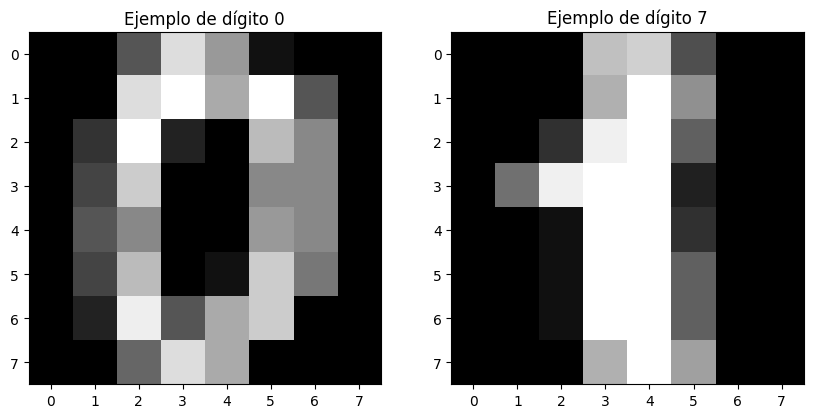

In [4]:
imagen0 = data[labels == 0][0]
imagen1 = data[labels == 1][0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[0].set_title('Ejemplo de dígito 0')
axs[1].imshow(imagen1, cmap = 'gray')
axs[1].set_title('Ejemplo de dígito 7')
plt.show()

In [18]:
"""
FUNCIÓN ORIGINAL
"""
def conv2d(I, W, b, stride = 1):
  h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
  w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
  a = np.zeros((h_s, w_s))
  for i in range(h_s):
    for j in range(w_s):
      I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]
      a[i, j] = (I_m * W).sum() + b

  return a

## Filtro

Definamos un filtro de $3 \times 3$ que detecte bordes en cierta orientación:

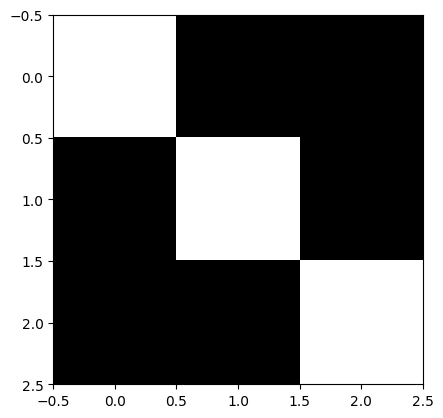

In [19]:
# No se modifica el filtro, pero como bien se describe en el notebook, se pueden tener distintos filtros.
filter1 = np.zeros((3,3))
np.fill_diagonal(filter1, np.array([1, 1, 1]))
plt.imshow(filter1 * 0.5 + 0.5, cmap = 'gray')
plt.show()

<span style="color:RED">----------------------SOLUCIÓN DE TAREA----------------------</span>

**Ejercicio 1: Operación de convolución**

Para modificar esta función y obtener una convolución que funcione sobre varios canales y que permita trabajar con imágenes a color en realidad se tienen que hacer pocos cambios a la función previamente definida. La convolución será igual para cualquier canal, lo único necesario es agregar este canal al procesamiento de la función. 

1. Primero definimos la función turn_2d3d( ) que extendiende una imagen de nuestro dataset para tener 3 canales. Como podemos ver es cuestión de agregar la dimensión de los canales y rellenarlos manualmente.
2. Siguiente es la función conv3d( ) que es básciamente igual a conv2d( ) solo que en el bucle del doble for, la variable I_m recorre las dimensiones base de la imagen al igual que la última dimensión de coloración. Esto se hace gracias a que agregamos un ":" al final de la lista.

In [7]:
def turn_2d3d(imagen_base):
    """
    Extiende una imagen del conjunto de datos previo para tener 3 canales.
    """
    imagen_3d = np.zeros((8,8,3))

    # Estos valores en realidad no cambian nada de la imagen original
    # Solo modifican la intensidad para que al menos algo cambie.
    imagen_3d[:, :, 0] = imagen_base
    imagen_3d[:, :, 1] = imagen_base * 0.2
    imagen_3d[:, :, 2] = imagen_base * 0.5
    return imagen_3d

# Imprimimos la forma del arreglo para ver los cambios
imagen0_3d = turn_2d3d(imagen0)
print(imagen0.shape, imagen0_3d.shape)

(8, 8) (8, 8, 3)


In [8]:
def conv_rgb(I, W, b, stride = 1):
    """
    Convolución para imágenes a color. Usa los mismos parámetros que la convolución 2d. 
    """
    h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
    w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
    a = np.zeros((h_s, w_s))
    for i in range(h_s):
        for j in range(w_s):
            I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1], :] # ¡Aquí está el cambio!
            a[i, j] = (I_m * W).sum() + b

    return a

# Notamos que sigue funcionando sin importar el cambio que le acabamos de hacer.
conv_rgb(imagen0_3d, filter1, 0)

array([[1.06875, 1.5375 , 3.03125, 2.95625, 1.93125, 1.85   ],
       [1.3375 , 1.46875, 3.025  , 2.25   , 1.70625, 2.3875 ],
       [1.24375, 1.25   , 2.2125 , 1.     , 1.1    , 2.05   ],
       [1.13125, 1.2    , 1.96875, 0.91875, 1.14375, 2.1    ],
       [1.16875, 1.25625, 2.46875, 1.48125, 1.56875, 2.25   ],
       [1.04375, 1.325  , 2.81875, 2.1375 , 1.83125, 1.5875 ]])

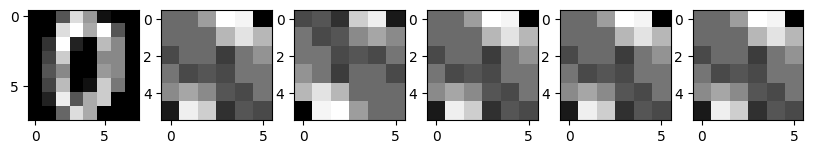

In [10]:
from scipy.signal import correlate2d, convolve2d

sigmoid = lambda z: 1. / (1. + np.exp(-z))

ccorr = sigmoid(correlate2d(imagen0, filter1, mode = 'valid'))
ccorr2 = sigmoid(correlate2d(filter1, imagen0, mode = 'valid'))

conv = sigmoid(convolve2d(imagen0, filter1, mode = 'valid'))
conv2 = sigmoid(convolve2d(filter1, imagen0, mode = 'valid'))

a = sigmoid(conv2d(imagen0, filter1, 0))

fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[1].imshow(ccorr, cmap = 'gray')
axs[2].imshow(ccorr2, cmap = 'gray')
axs[3].imshow(conv, cmap = 'gray')
axs[4].imshow(conv2, cmap = 'gray')
axs[5].imshow(a, cmap = 'gray')
plt.show()

**Hacemos las mismas gráficas que en la celda previa pero con la convolución RGB**

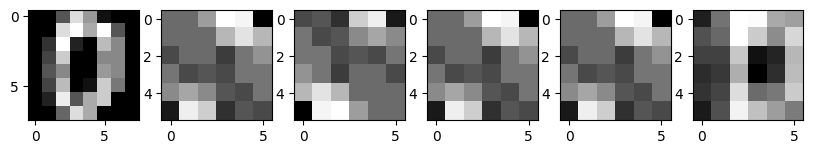

In [11]:
from scipy.signal import correlate2d, convolve2d

ccorr = sigmoid(correlate2d(imagen0, filter1, mode = 'valid'))
ccorr2 = sigmoid(correlate2d(filter1, imagen0, mode = 'valid'))

conv = sigmoid(convolve2d(imagen0, filter1, mode = 'valid'))
conv2 = sigmoid(convolve2d(filter1, imagen0, mode = 'valid'))

a = sigmoid(conv_rgb(turn_2d3d(imagen0), filter1, 0)) #Aquí está el pequeño cambio

fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[1].imshow(ccorr, cmap = 'gray')
axs[2].imshow(ccorr2, cmap = 'gray')
axs[3].imshow(conv, cmap = 'gray')
axs[4].imshow(conv2, cmap = 'gray')
axs[5].imshow(a, cmap = 'gray')
plt.show()

<span style="color:RED">----------------------FIN DEL EJERCICIO 1----------------------</span>

# Ejercico 3: Clasificación de rostros

Los datos de FairFace están disponibles desde HuggingFace, por lo que la importación se hace desde ahí. El código de la red neuronal se hace usando PyTroch. La evaluación de clasificación se hace con Sklearn.

**Obs:** Al importar el dataset desde HuggingFace nos ahorramos tener que importar las imágenes desde un directorio local, HuggingFace nos ayuda tanto en abrir y darnos la imagen bonita, así como en dividir de manera consistente el conjunto de datos para mejor reproducibilidad de experimentos.

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

ff_ds = load_dataset("HuggingFaceM4/FairFace", "0.25")
ff_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 86744
    })
    validation: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 10954
    })
})

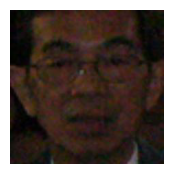

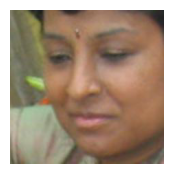

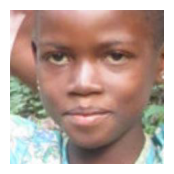

In [2]:
# Lista que solo tiene las imágenes.
# Obs: Guardamos solo una porción de las imágenes por cuestiones de recursos computacionales.
# En caso de querer hacer un entrenamiento más grande se tiene que quitar el parámetro de subset_len
subset_len = 1000
image_only = [ff_ds['train'][i]['image'] for i in range(subset_len)]
age_only = [ff_ds['train'][i]['age'] for i in range(subset_len)]

# Visualización de los datos
for _ in image_only[:3]:
    plt.figure(figsize=(2,2))
    plt.imshow(_)
    plt.axis('off')
    plt.show()

In [3]:
muestra = ff_ds['train'][0]
print('Exploración de datos')
print('IMAGEN')
print("Edad: {}".format(muestra['age']))
print("Género: {}".format(muestra['gender']))
print("Raza: {}".format(muestra['race']))
print("Detalles imagen: {}".format(muestra['image']))

Exploración de datos
IMAGEN
Edad: 6
Género: 0
Raza: 0
Detalles imagen: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x10DB3851490>


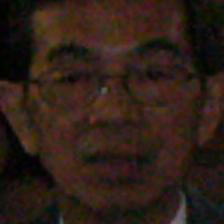

In [4]:
muestra['image']
# Nmms que dicen que este ser tiene 6 años qué pedo.

Tamaño original = (224, 224), canales = ('R', 'G', 'B')
Redimensionado = (64, 64), canales = ('R', 'G', 'B')


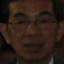

In [5]:
# Redimensión y aumento de datos. (Como en el notebook).
from torchvision import transforms as T

# Para aumentación de datos.
tr_ent = T.Compose([T.RandomResizedCrop(64, scale = (0.85, 1.0), antialias = True), T.RandomHorizontalFlip(), T.ToTensor()])

# Para modificar el tamaño de una red.
redim = T.Resize((64,64), antialias = True)
img_pil = muestra['image']
print("Tamaño original = {}, canales = {}".format(img_pil.size, img_pil.getbands()))

rd_img_pil = redim(img_pil)
print("Redimensionado = {}, canales = {}".format(rd_img_pil.size, rd_img_pil.getbands()))

# Vemos la imagen redimensionada
rd_img_pil

In [6]:
from torch.utils.data import Dataset
class IterateFace(Dataset):
    """
    Cambiamos el funcionamiento interno de la clase ya que las imágenes vienen bien procesdadas gracias a HuggingFace (tqm HF)
    """
    def __init__(self, dataset, transform = None):
        self.transform = transform
        self.dataset = dataset
    def __getitem__(self, idx):
        img = self.dataset['Img'].iloc[idx]
        cat = self.dataset['Cat'].iloc[idx]
        if self.transform:
            img = self.transform(img)
        return img, cat
    def __len__(self):
        return len(self.dataset)

df_dic = {'Img':image_only, 'Cat':age_only}
df = pd.DataFrame(data=df_dic)

OwO = IterateFace(df, tr_ent)

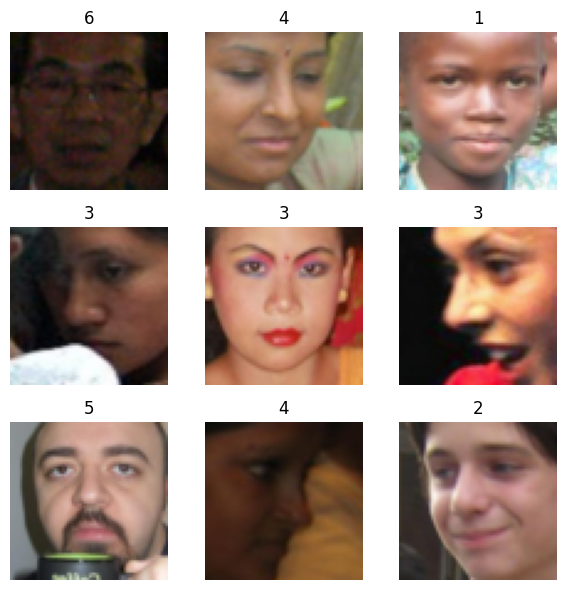

In [7]:
"""
En toda esta celda es igual al notebook base.
"""
import numpy as np
from math import sqrt

def muestra_imagenes(imgs, etiq):
    t_muestra = imgs.shape[0]
    n_filas = n_cols = int(sqrt(t_muestra))
    
    fig, ax = plt.subplots(nrows=n_filas, ncols=n_cols, figsize=(2 * n_filas, 2 * n_cols))
    for i in range(n_filas):
        for j in range(n_cols):
            idx = i * n_filas + j
            ax[i, j].imshow(imgs[idx])
            ax[i, j].axis('off')
            ax[i, j].set_title(etiq[idx])
    plt.tight_layout()
    plt.show()


it = iter(OwO)
muestras = [next(it) for i in range(10)]
imgs = [np.array(m[0].permute(1, 2, 0)) for m in muestras]
cats = [m[1] for m in muestras]

muestra_imagenes(np.array(imgs), cats)

In [8]:
# Creamos dataloader como en el notebook.
from torch.utils.data import DataLoader

data_load = DataLoader(OwO, batch_size = 64, shuffle = False)

it_entdl = iter(data_load)
lote = next(it_entdl)
print(f'Imágenes = {lote[0].shape}, Categorías = {lote[1].shape}')

Imágenes = torch.Size([64, 3, 64, 64]), Categorías = torch.Size([64])


In [9]:
import torch
from torch import nn
class ConvNeXtBlock(nn.Module):
    """
    ResNet modificada según los requerimientos de la tarea.
    """
    def __init__(self, cent, csal, downsample = False):
        super(Residual, self).__init__()
        stride = 1
    
        if downsample:
            stride = 2
    
        if cent != csal or downsample:
            self.conv1x1 = nn.Conv2d(cent, csal, 1, stride = stride, padding = 0)
        else:
            self.conv1x1 = None
        
        self.conv1 = nn.Conv2d(cent, csal, 3, stride = stride, padding = 1)
        self.bn1 = nn.BatchNorm2d(csal)
        self.conv2 = nn.Conv2d(csal, csal, 3, padding = 'same')
        self.bn2 = nn.BatchNorm2d(csal)

    def forward(self, x):
        y = self.conv1(x)
        y = self.bn1(y)
        #y = nn.functional.relu(y) # Cambio de función de activación ReLU por GeLU
        y = self.functional.gelu(y)
        y = self.conv2(y)
        y = self.bn2(y)
        
        if self.conv1x1:
            x = self.conv1x1(x)
        
        return nn.functional.relu(x + y)


class BloqueConvNeXt(nn.Module):
    def __init__(self,
                 cent,
                 csal,
                 k = 2,
                 downsample = False):
        super(BloqueConvNeXt, self).__init__()

        self.blocks = [ConvNeXtBlock(cent, csal, downsample = downsample)]
        for i in range(1, k):
            self.blocks.append(ConvNeXtBlock(csal, csal))
        self.blocks = nn.ModuleList(self.blocks)

    def forward(self, x):
        for block in self.blocks:
            x = block(x)
        return x

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoImageProcessor, AutoModelForImageClassification

class FairFaceAgeNet(nn.Module):
    def __init__(self, num_classes, freeze_backbone=True):
        super(FairFaceAgeNet, self).__init__()
        
        # Modelo preentrenado elegido.
        model_name = "dima806/fairface_age_image_detection"
        self.processor = AutoImageProcessor.from_pretrained(model_name)
        self.backbone = AutoModelForImageClassification.from_pretrained(model_name)
        
        if freeze_backbone:
            for param in self.backbone.parameters():
                param.requires_grad = False
        
        hidden_size = self.backbone.config.hidden_size
        
        # Cabeza de clasificación.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        outputs = self.backbone.base_model(x)
        
        features = outputs.last_hidden_state[:, 0, :]
        
        logits = self.classifier(features)
        
        return logits

def preprocess_images(images, processor):
    inputs = processor(images, return_tensors="pt")
    return inputs.pixel_values

num_classes = 10 
model = FairFaceAgeNet(num_classes=num_classes, freeze_backbone=True)

# Ejercicio 4: Reconocimiento de comandos de voz

In [1]:
import random
import librosa
import IPython as ip
import matplotlib.pyplot as plt
import numpy as np
import torch as th
import torch.nn as nn
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import DataLoader
from torchaudio.datasets import SPEECHCOMMANDS
from tqdm.auto import trange
import collections

In [2]:
speech_ds = SPEECHCOMMANDS(r'C:\Users\FLopezP\Desktop\PCIC\Tercer Semestre\Datasets', download = False)
CLASSES = (
    'backward', 'bed', 'bird', 'cat', 'dog',
    'down', 'eight', 'five', 'follow', 'forward',
    'four', 'go', 'happy', 'house', 'learn',
    'left', 'marvin', 'nine', 'no', 'off',
    'on', 'one', 'right', 'seven', 'sheila',
    'six', 'stop', 'three', 'tree', 'two',
    'up', 'visual', 'wow', 'yes', 'zero'
)

NUM_CLASSES = len(CLASSES)
CLASS_IDX = {c: i for i, c in enumerate(CLASSES)}
print(CLASS_IDX)

{'backward': 0, 'bed': 1, 'bird': 2, 'cat': 3, 'dog': 4, 'down': 5, 'eight': 6, 'five': 7, 'follow': 8, 'forward': 9, 'four': 10, 'go': 11, 'happy': 12, 'house': 13, 'learn': 14, 'left': 15, 'marvin': 16, 'nine': 17, 'no': 18, 'off': 19, 'on': 20, 'one': 21, 'right': 22, 'seven': 23, 'sheila': 24, 'six': 25, 'stop': 26, 'three': 27, 'tree': 28, 'two': 29, 'up': 30, 'visual': 31, 'wow': 32, 'yes': 33, 'zero': 34}


In [3]:
BATCH_SIZE = 32
SECS = 1
SAMPLE_RATE = 16000
N_FFT = 400
HOP_LENGTH = N_FFT // 2

class MySpeechCommands(SPEECHCOMMANDS):
    """
    Clase para crear el dataloader. (Extraída del notebook)
    """
    def __init__(self, 
               root, 
               download = False, 
               subset = None,
               waveform_tsfm = None, 
               label_tsfm = None):
        super().__init__(root = root, download = download, subset = subset)
        self.waveform_tsfm = waveform_tsfm
        self.label_tsfm = label_tsfm
    
    def __getitem__(self, i):
        waveform, sample_rate, label, *_ = super().__getitem__(i)
    
        if self.waveform_tsfm:
            x = self.waveform_tsfm(waveform)
        
        if self.label_tsfm:
            y = self.label_tsfm(label)
          
        return x, y, label, sample_rate
      
class WaveformPadTruncate(nn.Module):
    """
    Clase para crear el dataloader. (Extraída del notebook)
    """
    def __init__(self, secs = SECS, sample_rate = SAMPLE_RATE):
        super().__init__()
        self.samples = secs * sample_rate
    
    def forward(self, waveform):
        samples = waveform.shape[1]
    
        if samples < self.samples:
            difference = self.samples - samples
            padding = th.zeros(1, difference)
            waveform = th.cat([waveform, padding], 1)
        
        elif samples > self.samples:
            start = random.randint(0, waveform.shape[1] - self.samples)
            # Devuelve un nuevo tensor que es una versión reducida del tensor de entrada.
            waveform = waveform.narrow(1, start, self.samples) # (dimension, start, length)
            
        return waveform

def label2index(label):
    return CLASS_IDX[label]

In [4]:
ds = MySpeechCommands(
  root = r'C:\Users\FLopezP\Desktop\PCIC\Tercer Semestre\Datasets',
  waveform_tsfm = WaveformPadTruncate(),
  label_tsfm = label2index,
)

# creamos un DataLoader
dl = DataLoader(
  ds,
  batch_size = BATCH_SIZE,
  shuffle = True)

In [5]:
class RecurrentClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, 
                 num_classes=NUM_CLASSES, dropout=0.3, bidirectional=True):
        """
        Red recurrente.
        
        input_size: 1 (el default para pasos por tiempo)
        hidden_size: Unidades para cada bloque LSTM
        num_layers: Cantidad de capas LSTM.
        num_classes: La cantidad de clases que vamos a clasificar.
        dropout: Probabilidad del dropout entre clase.
        bidirectional: Si se usa un paso bidireccional.
        """
        super(RecurrentClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=bidirectional
        )
        
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * self.num_directions, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, num_classes) 
        )
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.transpose(1, 2)
        
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        softmax = self.softmax(out)
        final_output = softmax.argmax(dim = 1)
        final = th.mode(final_output, 0)
        final = th.Tensor([final[0]])
        return final

def train_loop(dataloader, model, lf, optimizer):
    """
    Loop genérico de entrenamiento. (Siguiendo: https://docs.pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#full-implementation)
    dataloader -> Pues un dataloader pa
    model -> RedNeuronal()
    lf -> Loss Function
    optimizer -> Pues un optimizer bb
    """
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(dataloader):
        X = data[0]
        target = data[1][0]
        target = th.Tensor([target]).long()
        pred = model(X)
        target = target.long()
        pred = pred.type(th.float32)
        target = target.type(th.float32)
        pred.requires_grad_(True)        
        loss = lf(pred, target)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * BATCH_SIZE + len(X)
            print("Loss: {}. [{}/{}]".format(round(loss, 4), current, size))


red_perra = RecurrentClassifier(
    input_size=1,
    hidden_size=128,
    num_layers=2,
    num_classes=NUM_CLASSES,
    dropout=0.3,
    bidirectional=False
)

lr = 0.003
epochs = 3
loss_fun = nn.CrossEntropyLoss()
optim = th.optim.Adam(red_perra.parameters(), lr = lr)

In [6]:
train_loop(dl, red_perra, loss_fun, optim)

Loss: -0.0. [32/105829]
Loss: -0.0. [3232/105829]
Loss: -0.0. [6432/105829]
Loss: -0.0. [9632/105829]
Loss: -0.0. [12832/105829]
Loss: -0.0. [16032/105829]
Loss: -0.0. [19232/105829]
Loss: -0.0. [22432/105829]
Loss: -0.0. [25632/105829]
Loss: -0.0. [28832/105829]
Loss: -0.0. [32032/105829]
Loss: -0.0. [35232/105829]
Loss: -0.0. [38432/105829]
Loss: -0.0. [41632/105829]
Loss: -0.0. [44832/105829]
Loss: -0.0. [48032/105829]
Loss: -0.0. [51232/105829]
Loss: -0.0. [54432/105829]
Loss: -0.0. [57632/105829]
Loss: -0.0. [60832/105829]
Loss: -0.0. [64032/105829]
Loss: -0.0. [67232/105829]
Loss: -0.0. [70432/105829]
Loss: -0.0. [73632/105829]
Loss: -0.0. [76832/105829]
Loss: -0.0. [80032/105829]
Loss: -0.0. [83232/105829]
Loss: -0.0. [86432/105829]
Loss: -0.0. [89632/105829]
Loss: -0.0. [92832/105829]
Loss: -0.0. [96032/105829]
Loss: -0.0. [99232/105829]
Loss: -0.0. [102432/105829]
Loss: -0.0. [105632/105829]


In [17]:
import torch
import torch.nn as nn

class Conv1DClassifier(nn.Module):
    def __init__(self, input_channels=1, num_classes=NUM_CLASSES, dropout=0.3):
        """
        Red de clasificación usando Conv1D.
        

        input_channels = int ; Cantidad de canales de entrada.
        num_classes = int; Cantidad de clases.
        dropout = float; Probabilidad de dropout.
        """
        super(Conv1DClassifier, self).__init__()
        
        self.conv_blocks = nn.Sequential(
            nn.Conv1d(input_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(dropout),

            nn.Conv1d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(dropout),
            
            nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(dropout),

            nn.Conv1d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, num_classes)
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.conv_blocks(x)
        x = self.fc(x)
        softmax = self.softmax(x)
        final_output = softmax.argmax(dim = 1)
        final = th.mode(final_output, 0)
        final = th.Tensor([final[0]])
        return final

red_chula = Conv1DClassifier(
    input_channels=1,
    num_classes=NUM_CLASSES,
    dropout=0.2
)

In [18]:
lr = 0.003
epochs = 3
loss_fun = nn.CrossEntropyLoss()
optim = th.optim.Adam(red_chula.parameters(), lr = lr)
for i in range(epochs):
    print('Epoch: {}'.format(i+1))
    train_loop(dl, red_chula, loss_fun, optim)

Epoch: 1
Loss: -0.0. [32/105829]
Loss: -0.0. [3232/105829]
Loss: -0.0. [6432/105829]
Loss: -0.0. [9632/105829]
Loss: -0.0. [12832/105829]
Loss: -0.0. [16032/105829]
Loss: -0.0. [19232/105829]
Loss: -0.0. [22432/105829]
Loss: -0.0. [25632/105829]
Loss: -0.0. [28832/105829]
Loss: -0.0. [32032/105829]
Loss: -0.0. [35232/105829]
Loss: -0.0. [38432/105829]
Loss: -0.0. [41632/105829]
Loss: -0.0. [44832/105829]
Loss: -0.0. [48032/105829]
Loss: -0.0. [51232/105829]
Loss: -0.0. [54432/105829]
Loss: -0.0. [57632/105829]
Loss: -0.0. [60832/105829]
Loss: -0.0. [64032/105829]
Loss: -0.0. [67232/105829]
Loss: -0.0. [70432/105829]
Loss: -0.0. [73632/105829]
Loss: -0.0. [76832/105829]
Loss: -0.0. [80032/105829]
Loss: -0.0. [83232/105829]
Loss: -0.0. [86432/105829]
Loss: -0.0. [89632/105829]
Loss: -0.0. [92832/105829]
Loss: -0.0. [96032/105829]
Loss: -0.0. [99232/105829]
Loss: -0.0. [102432/105829]
Loss: -0.0. [105632/105829]
Epoch: 2
Loss: -0.0. [32/105829]
Loss: -0.0. [3232/105829]
Loss: -0.0. [6432/

In [35]:
import torch
import torch.nn as nn

class Conv2DClassifier(nn.Module):
    def __init__(self, input_channels=1, num_classes=10, dropout=0.3):
        """
        Red de clasificación usando Conv2D.
        

        input_channels = int ; Cantidad de canales de entrada.
        num_classes = int; Cantidad de clases.
        dropout = float; Probabilidad de dropout.
        """
        super(Conv2DClassifier, self).__init__()
        
        self.conv_blocks = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 1), stride=(2, 2)),
            nn.Dropout(dropout),
            
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 1), stride=(1, 1)),
            nn.Dropout(dropout),
            
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 1), stride=(1,1)),
            nn.Dropout(dropout),

            nn.Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Global average pooling
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, num_classes)
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = x.unsqueeze(2)  # (32, 1, 1, 16000)
        x = self.conv_blocks(x)
        x = self.fc(x)
        softmax = self.softmax(x)
        final_output = softmax.argmax(dim = 1)
        final = th.mode(final_output, 0)
        final = th.Tensor([final[0]])
        return final



red_insana = Conv2DClassifier(
    input_channels=1,
    num_classes=NUM_CLASSES,
    dropout=0.2
)

In [ ]:
lr = 0.003
epochs = 3
loss_fun = nn.CrossEntropyLoss()
optim = th.optim.Adam(red_insana.parameters(), lr = lr)

for i in range(epochs):
    print("Época: {}".format(i+1))
    train_loop(dl, red_insana, loss_fun, optim)

Época: 1
Loss: -0.0. [32/105829]
Loss: -0.0. [3232/105829]
Loss: -0.0. [6432/105829]
Loss: -0.0. [9632/105829]
Loss: -0.0. [12832/105829]
Loss: -0.0. [16032/105829]
Loss: -0.0. [19232/105829]
Loss: -0.0. [22432/105829]
Loss: -0.0. [25632/105829]
Loss: -0.0. [28832/105829]
Loss: -0.0. [32032/105829]
Loss: -0.0. [35232/105829]
Loss: -0.0. [38432/105829]
Loss: -0.0. [41632/105829]
Loss: -0.0. [44832/105829]
Loss: -0.0. [48032/105829]
Loss: -0.0. [51232/105829]
Loss: -0.0. [54432/105829]
Loss: -0.0. [57632/105829]
Loss: -0.0. [60832/105829]
Loss: -0.0. [64032/105829]
Loss: -0.0. [67232/105829]
Loss: -0.0. [70432/105829]
Loss: -0.0. [73632/105829]
Loss: -0.0. [76832/105829]
Loss: -0.0. [80032/105829]
Loss: -0.0. [83232/105829]
Loss: -0.0. [86432/105829]
